<a href="https://colab.research.google.com/github/Vlasovets/Deep_learning_course_assistantship/blob/master/Building_convolutional_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced topics in User Interfaces


## 📢 Note
This exercise is an extension of the previous exercise on Building Autoencoders with <font color=lightgreen>fully-connected neural layers</font>. 

This exercise focuses on <font color=lightpink>convolutional network</font>, and it requires understanding of some aspects have been explained in the previous exercise. It is highly recommended to start this exercise only after the previous one.

## 🧐 **Learning goals** 
The tutorial covers the topics explained during the lecture in the following parts:
1.   to continue classification topic with convolutional neural networks (CNNs)
2.   to get introduced with a simple autoencoder based on CNN
3.   to train and test models on the Fashion-MNIST dataset
4.   to work with different parameters of the model

## 🔑1. Introduction

### From previous exercise you know🤔

"Autoencoding" is a data compression algorithm where the compression and decompression functions are:
* <font color=lightgreen>Data-specific</font>

* <font color=lightblue>Lossy</font>


* <font color=lightpink>Learned automatically from examples rather than engineered by a human</font>

Here, we are going to work with autoencoders based on CNN.


In [5]:
from IPython.display import Image
Image(url='https://www.researchgate.net/profile/Xifeng_Guo/publication/320658590/figure/fig1/AS:614154637418504@1523437284408/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png')

### 🔨 How to build autoencoders?
To build an autoencoder, you need three things:

1) <font color=gold>encoding function</font>

2) <font color=pink>decoding function</font> 

3) <font color=lightblue>loss function</font>

If you need to refresh your knowledge about CNN you can check the slides from the lecture. 

In addition, there is 26min😨 video which can help you as well.

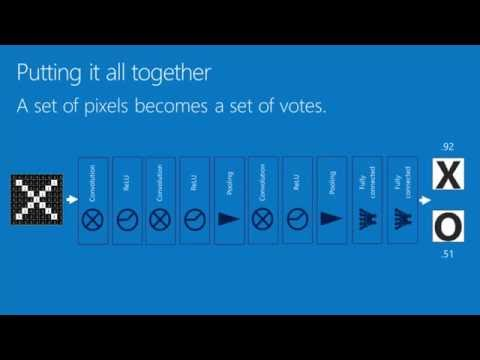

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo('FmpDIaiMIeA')

## 2. 👠 Fashion-MNIST dataset
 
Fashion-MNIST is a dataset of [Zalando’s](https://research.zalando.com/) article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

In [6]:
from IPython.display import Image
Image(url='https://s3-eu-central-1.amazonaws.com/zalando-wp-zalando-research-production/2017/08/fashion-mnist-sprite.png')

Imported necessary libraries to start the most exciting part.💣

In [0]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Normalize pixel values so that every vector is defined in [0,1].
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
# Split train partition again, so that we can use a subset for validation.
num_val_imgs = int(0.1 * len(X_train))
X_train, X_valid = X_train[:-num_val_imgs], X_train[-num_val_imgs:]
y_train, y_valid = y_train[:-num_val_imgs], y_train[-num_val_imgs:]

In [0]:
# The dataset has 28x28 grayscale images.
# Since the autoencoder we're going to build is convolutional, we have to specify the number of channels.
IMG_SHAPE = (28, 28, 1)

## ⚡ 3. Model Training

### Autoencoder and CNN

Remark🤓 

Since our inputs are images, it makes sense to use convolutional neural networks as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one to see if the statement above is correct.

In [0]:
def convreshape(samples, new_shape):
  num_samples = samples.shape[0] # equals to `len(samples)`
  final_shape = (num_samples,) + new_shape
  return samples.reshape(final_shape)

In [0]:
X_train_conv = convreshape(X_train, IMG_SHAPE)
X_valid_conv = convreshape(X_valid, IMG_SHAPE)
X_test_conv = convreshape(X_test, IMG_SHAPE)

In [16]:
model_input = tf.keras.layers.Input(IMG_SHAPE)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Encoder 🔒 

In [0]:
conv_encoder = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(model_input)
conv_encoder = tf.keras.layers.MaxPooling2D((2, 2))(conv_encoder)
latent_layer = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv_encoder)

### Decoder 🔓


In [0]:
conv_decoder = tf.keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(latent_layer)
conv_decoder = tf.keras.layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(conv_decoder)
model_output = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv_decoder)

We use Conv2DTranspose instead of UpSampling2D because Conv2DTranspose is <font color=pink>"smart upsampling"</font>.

It is also called <font color=gold>Deconvolution</font> since the need for transposed convolutions generally arises from the desire to use a transformation going in the opposite direction of a normal convolution, i.e., from something that has the shape of the output of some convolution to something that has the shape of its input while maintaining a connectivity pattern that is compatible with said convolution. 

🔍 More information about convolutional layers can be found [here](https://keras.io/layers/convolutional/).

In [19]:
# Create autoencoder model, compile it, and train it.
conv_autoencoder = tf.keras.Model(model_input, model_output)
conv_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 1)         577   

### 🚀 Compile and train the model

Define a custom metric to monitor reconstruction accuracy, since [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) is not human-friendly. 

Let's call it "reconstruction accuracy", or "rec_acc" for short.

In [0]:
def rec_acc(y_true, y_pred):
    return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [21]:
conv_autoencoder.compile(loss='mse', optimizer='adam', metrics=['mse', rec_acc])
conv_autoencoder.fit(X_train_conv, X_train_conv, epochs=2, validation_data=[X_valid_conv, X_valid_conv])

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 13s 237us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - rec_acc: 0.9686 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - val_rec_acc: 0.9807
Epoch 2/2
54000/54000 [==============================] - 9s 168us/sample - loss: 0.0014 - mean_squared_error: 0.0014 - rec_acc: 0.9826 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_rec_acc: 0.9841


As in the previous exercise, our pixel values are defined in the [0,1] range. We could use binary_crossentropy as loss function, however, let's use MSE to make the model more general.

The model converges to a minimum loss significantly better than our previous models (this is in large part due to the higher entropic capacity of the encoded representation).

💾 Finally, save the models.

In [0]:
conv_autoencoder.save('fashion_mnist-conv_autoencoder.h5')

## 💎 4. Model testing

Since we work with images, it is very simple to check how good our model is. 

Let's pick a random item from the data we have.

In [0]:
def randselect(arr, num=1):
    num_samples = arr.shape[0]
    rand_index = np.random.choice(num_samples, num, replace=False)
    return arr[rand_index]

The function below is <font color=red>almost</font> the same as defined in the previous exercise,
with the difference that we enforce the image shape. 

In fact, we can use this function "as is" to display images from the autoencoder file, but not the other way around.

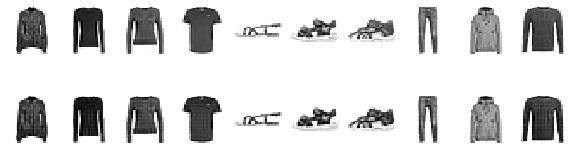

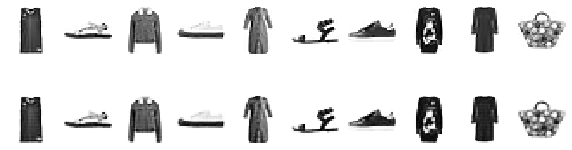

In [24]:
def show_reconstructions(model, images, num_images=10):
    samples = images[:num_images]
    # Better: select `num_images` at random.
    indices = np.random.choice(images.shape[0], num_images, replace=False)
    samples = randselect(images, num_images)
    reconstructions = model.predict(samples)
    # Allocate output fig size, in inches.
    fig = plt.figure(figsize=(num_images, num_images//3))
    for i in range(num_images):
        # Ensure that images are read as 2D arrays.
        img_siz = tuple(IMG_SHAPE[0:2])
        img_src = samples[i].reshape(img_siz)
        img_rec = reconstructions[i].reshape(img_siz)
        # Plot original images in the top row.
        plt.subplot(2, num_images, 1 + i)
        plt.axis('off')
        plt.imshow(img_src, cmap='binary')
        # Plot reconstructed images in the bottom row.
        plt.subplot(2, num_images, 1 + num_images + i)
        plt.axis('off')
        plt.imshow(img_rec, cmap='binary')
    fig.show()

show_reconstructions(conv_autoencoder, X_valid_conv)
show_reconstructions(conv_autoencoder, X_test_conv)

As you can see CNN shows better perfomance compare to fully-connected model. It is clear which item is a dress or a bag, for example.

## 🎁 5. Bonus Exercise

#### Visualize the latent space, as we did in the previous exercise.

In [0]:
from sklearn.manifold import TSNE

recs = conv_autoencoder.predict(X_valid_conv)
tsne = TSNE() # project to 2 dims by default

s = recs.shape # (num_samples, width, height, num_channels)
new_shape = (s[0], np.prod(s[1:])) # (num_samples, width * height)
flat = recs.reshape(new_shape)
comp = tsne.fit_transform(flat)
# Normalize data bounds so that they fit in a [0,1] square plot.
comp = (comp - comp.min()) / (comp.max() - comp.min())

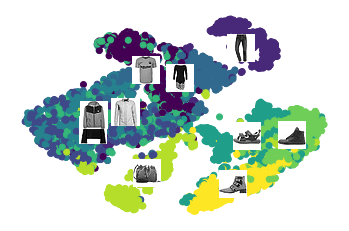

In [27]:
def centroid(arr):
    N, dims = arr.shape
    return np.array([np.sum(arr[:, i])/N for i in range(dims)])

plt.scatter(comp[:, 0], comp[:, 1], c=y_valid)
for label in list(set(y_valid)):
    # Gather all samples with current label.
    indices = np.where(y_valid == label)
    samples_orig = np.take(X_valid, indices[0], axis=0)
    samples_comp = np.take(comp, indices[0], axis=0)
    # Compute centroid of projected samples.
    center = centroid(samples_comp)
    # Display a representative image (at random) near each centroid.
    # NB: `np.random.choice()` always returns a list, even if we request only one result.
    sample = randselect(samples_orig)[0]
    imgbox = mpl.offsetbox.OffsetImage(sample, cmap='binary')
    imgpic = mpl.offsetbox.AnnotationBbox(imgbox, center, frameon=False)
    plt.gca().add_artist(imgpic)

plt.axis('off')
plt.show()

To sum up, as you can see we have clusters of different items grouped by the category.

The results are much better comparing to the fully-connected model, the item segmentation is more clear. 

For instance, we see an 'island' of different types of shoes 🥾 in the right bottom corner, different types of dresses 👗 , shirts👕 , and jackets🧥 around the center. Also, pants👖 and bags👜 are far away from other groups

## 🏁 6. Conclusion

Now, you know:

1.   CNN models for image classification problem
2.   different types of convolutional layers
3.   how to use Fashion-MNIST dataset for your projects
4.   how to work with different parameters of the model
5.   how to flatten the data and visualize model results

Do not hesitate to ask questions at otorrent@mail.ru

Thank you for your attention and see you next exercise session!